# <center> Final Examination
#### <center> ISE-529, Fall 2021
#### <center>  Due:  October 9, 2021 by 7:00PM PST (note change!)
#### <center> Haotian Liang

**General instructions**:  This exam consists of 5 problems.  __You must complete problem 1.  You may select any 3 of the remaining 4 problems (2-5) to complete__.  Include only 4 of the problems in your solution, but do not include all 5 (if you include all 5, I will grade only the first 4).  Each problem is equally weighted (25 points per problem) with points equally distributed among the sub-questions within each problem.

This exam is open books/open notes.  You may consult any resource to complete it.  However, all work must be done individually and you may not receive assistance from any other person.

Complete the examination by entering your solutions (code and text) into this Jupyter Notebook file, create an HTML version (using File -> Download As) and upload the HTML version to Blackboard using the same procedures used for homework assignments.

Good luck and enjoy your winter break!  I look forward to seeing many of you again in the spring semester!

In [243]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from scipy.stats import ttest_1samp
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
https://www.w3schools.com/python/scipy/scipy_statistical_significance_tests.php
https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_text.html

**1)  Linear Model Development**

For this problem we are going to develop a linear model.  We will be using only a training dataset and we will perform our assessments against that training dataset (there will be no test or validation data).  For this problem, use the OLS linear regression model in the statsmodels package.  Don't forget that when using this package that we need to add a constant to the predictor (X) dataframe (using the sm.add_constant() function)

Load the file "Problem 1 Data.csv" into a dataframe and perform the following opeartions:

In [244]:
Data_1 = pd.read_csv('Problem 1 Data.csv')
Data_1

,X1,X2,X3,X4,X5,X6,Y
0,416,799,392,782,558,778,26585.25739
1,869,611,433,559,618,648,25102.12336
2,382,688,174,839,405,834,30935.33046
3,159,776,796,714,562,740,23229.41281
4,836,352,849,734,880,582,27540.51232
...,...,...,...,...,...,...,...
995,816,761,742,639,798,784,22506.76782
996,762,1098,119,600,478,969,25592.92055
997,470,1084,245,990,520,970,35225.63495
998,839,461,399,805,726,280,32747.25257


1a)  Check to see if there are any pairs of predictors that are highly correlated.  Remove a predictor if its correlation coefficient is greater than 0.75.  Remove the highest number of the pair (for example, if X1 and and X2 are highly correlated, remove X2).

In [245]:
Data_1.select_dtypes(include=np.number).drop('Y',1).corr()

,X1,X2,X3,X4,X5,X6
X1,1.000000,0.062628,-0.001561,0.030482,0.488238,0.042176
X2,0.062628,1.000000,-0.028663,-0.018169,0.005195,0.806152
X3,-0.001561,-0.028663,1.000000,0.052549,0.668215,-0.015158
X4,0.030482,-0.018169,0.052549,1.000000,0.549192,-0.035130
X5,0.488238,0.005195,0.668215,0.549192,1.000000,-0.002166
X6,0.042176,0.806152,-0.015158,-0.035130,-0.002166,1.000000


In [246]:
Data_1=Data_1.drop('X6',1)

In [247]:
Data_1

,X1,X2,X3,X4,X5,Y
0,416,799,392,782,558,26585.25739
1,869,611,433,559,618,25102.12336
2,382,688,174,839,405,30935.33046
3,159,776,796,714,562,23229.41281
4,836,352,849,734,880,27540.51232
...,...,...,...,...,...,...
995,816,761,742,639,798,22506.76782
996,762,1098,119,600,478,25592.92055
997,470,1084,245,990,520,35225.63495
998,839,461,399,805,726,32747.25257


1b)  Write a Python function to test for multi-collinearity.  Call your function vif and pass it two paramaters - predictors (a dataframe containing numeric predictors) and index (an integer indicating which predictor to test).

Do not use a built-in function such as variance_inflation_factor from the statsmodels package.  

In [248]:
def vif(data):
    w=[]
    data=data.drop('Y',1)
    a=len(data.columns)
    for i in range(a):
        data_list = list(data)
        X = data.drop(data_list[i],1)
        X = sm.add_constant(X)
        model = sm.OLS(data[data_list[i]], X).fit()
        r2_score = model.rsquared
        vif = 1/(1-r2_score)
        w.append(vif)
    e=pd.DataFrame()
    e['columns']=data.columns
    e['multi-collinearity']=w
    return e

1c)  Call the function for each numeric predictor in your dataset.  Drop any predictor from your dataset which has a VIF greater than 10.

In [249]:
vif(Data_1)

,columns,multi-collinearity
0,X1,4.510285
1,X2,1.005256
2,X3,7.454348
3,X4,4.924278
4,X5,15.616375


In [250]:
Data_1=Data_1.drop('X5',1)

In [251]:
Data_1

,X1,X2,X3,X4,Y
0,416,799,392,782,26585.25739
1,869,611,433,559,25102.12336
2,382,688,174,839,30935.33046
3,159,776,796,714,23229.41281
4,836,352,849,734,27540.51232
...,...,...,...,...,...
995,816,761,742,639,22506.76782
996,762,1098,119,600,25592.92055
997,470,1084,245,990,35225.63495
998,839,461,399,805,32747.25257


1d)  Re-check your dataframe to see if there are still any predictors with VIF scores greater than 10 or pairs of predictors with a correlation coefficient greater than 0.75.

In [252]:
vif(Data_1)

,columns,multi-collinearity
0,X1,1.004949
1,X2,1.005111
2,X3,1.003544
3,X4,1.004059


In [253]:
Data_1.select_dtypes(include=np.number).drop('Y',1).corr()

,X1,X2,X3,X4
X1,1.000000,0.062628,-0.001561,0.030482
X2,0.062628,1.000000,-0.028663,-0.018169
X3,-0.001561,-0.028663,1.000000,0.052549
X4,0.030482,-0.018169,0.052549,1.000000


1e)  Create a linear regression model for your dataset.  What is the training $R^{2}$?

In [254]:
Data_1=sm.add_constant(Data_1)
Data_1

,const,X1,X2,X3,X4,Y
0,1.0,416,799,392,782,26585.25739
1,1.0,869,611,433,559,25102.12336
2,1.0,382,688,174,839,30935.33046
3,1.0,159,776,796,714,23229.41281
4,1.0,836,352,849,734,27540.51232
...,...,...,...,...,...,...
995,1.0,816,761,742,639,22506.76782
996,1.0,762,1098,119,600,25592.92055
997,1.0,470,1084,245,990,35225.63495
998,1.0,839,461,399,805,32747.25257


In [255]:
y = Data_1['Y']

In [256]:
est = sm.OLS(y, Data_1.drop('Y',1)).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     3296.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:15:55   Log-Likelihood:                -8998.5
No. Observations:                1000   AIC:                         1.801e+04
Df Residuals:                     995   BIC:                         1.803e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7653.7866    251.858     30.389      0.000    7159.553    8148.020
X1             5.3198      0.238     22.362      0.000       4.853       5.787
X2            -0.1112      0.189     -0.589      0.556      -0.482       0.259
X3            -5.1418      0.236    -21.756      0.000      -5.606      -4.678
X4            25.9947      0.235    110.712      0.000      25.534      26.455
==============================================================================
Omnibus:                     2083.015   Durbin-Watson:                   1.323
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7127999.605
Skew:                          16.341   Prob(JB):                         0.00
Kurtosis:                     415.315   Cond. No.                     4.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [257]:
print('R-squared is',0.930)

R-squared is 0.93


1f)  Create a residuals plot and remove any obvious outliers

In [258]:
y_hat=est.resid
y_hat

0      -1505.015573
1        588.686762
2        410.986041
3        348.702993
4        763.752189
           ...     
995    -2198.803266
996     -977.455131
997      717.038703
998     1807.224342
999    49688.862153
Length: 1000, dtype: float64

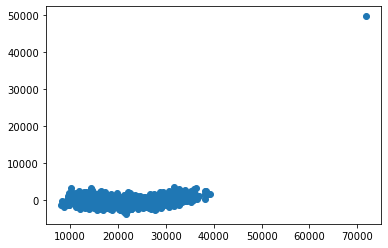

In [259]:
plt.scatter(y,y_hat)

In [260]:
out_l=y_hat.nlargest(n=1).index
out_l

Int64Index([999], dtype='int64')

In [261]:
Data_1=Data_1.drop(Data_1.index[999])

1g)  Re-create the residuals plot.  Do you observe anything in it indicating a need for model improvement?

In [262]:
est_1=sm.OLS(Data_1['Y'], Data_1.drop('Y',1)).fit()
y_hat_1=est_1.resid
y_hat_1

0     -1486.796885
1       745.027829
2       469.107969
3       213.761647
4       806.753862
          ...     
994    -782.383714
995   -2141.390160
996    -797.955406
997     752.262121
998    1944.251358
Length: 999, dtype: float64

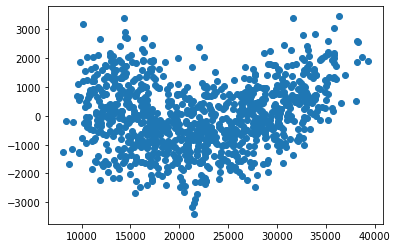

In [263]:
plt.scatter(Data_1['Y'],y_hat_1)

In [264]:
print('No, I did not see the outliers anymore and no improvement needed')

No, I did not see the outliers anymore and no improvement needed


1h)  Using scatterplots,assess the relationship of each predictor to the response variable Y.  If any appear to have a non-linear relationship, try adding a "squared" value to the dataset as a new predictor and create a new model.

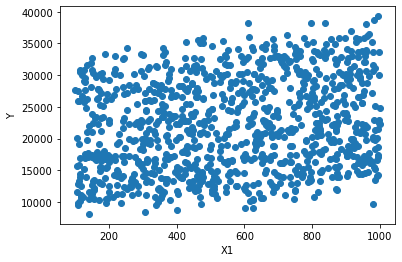

In [265]:
plt.scatter(Data_1['X1'], Data_1['Y'])
plt.xlabel('X1')
plt.ylabel('Y')
plt.show()

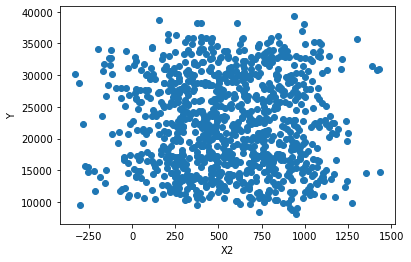

In [266]:
plt.scatter(Data_1['X2'], Data_1['Y'])
plt.xlabel('X2')
plt.ylabel('Y')
plt.show()

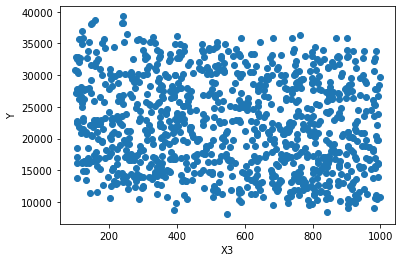

In [267]:
plt.scatter(Data_1['X3'], Data_1['Y'])
plt.xlabel('X3')
plt.ylabel('Y')
plt.show()

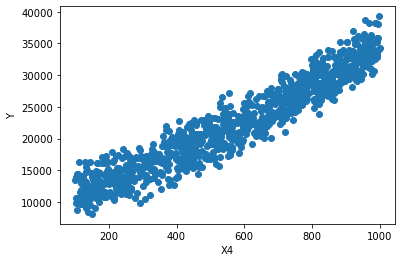

In [268]:
plt.scatter(Data_1['X4'], Data_1['Y'])
plt.xlabel('X4')
plt.ylabel('Y')
plt.show()

In [269]:
Data_1['X4_2'] = Data_1['X4']**2
Data_1

,const,X1,X2,X3,X4,Y,X4_2
0,1.0,416,799,392,782,26585.25739,611524
1,1.0,869,611,433,559,25102.12336,312481
2,1.0,382,688,174,839,30935.33046,703921
3,1.0,159,776,796,714,23229.41281,509796
4,1.0,836,352,849,734,27540.51232,538756
...,...,...,...,...,...,...,...
994,1.0,504,468,794,739,24663.78222,546121
995,1.0,816,761,742,639,22506.76782,408321
996,1.0,762,1098,119,600,25592.92055,360000
997,1.0,470,1084,245,990,35225.63495,980100


In [270]:
est_2 = sm.OLS(Data_1['Y'], Data_1.drop('Y',1))
est_2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.018e+04
Date:                Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:15:56   Log-Likelihood:                -8318.2
No. Observations:                 999   AIC:                         1.665e+04
Df Residuals:                     993   BIC:                         1.668e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9909.2941    180.154     55.005      0.000    9555.767    1.03e+04
X1             5.0069      0.122     41.140      0.000       4.768       5.246
X2            -0.1257      0.097     -1.302      0.193      -0.315       0.064
X3            -4.9286      0.121    -40.781      0.000      -5.166      -4.691
X4            15.2796      0.589     25.931      0.000      14.123      16.436
X4_2           0.0098      0.001     18.748      0.000       0.009       0.011
==============================================================================
Omnibus:                        3.857   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.145   Jarque-Bera (JB):                3.245
Skew:                           0.043   Prob(JB):                        0.197
Kurtosis:                       2.734   Cond. No.                     2.76e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1i)  Test each numeric predictor (not including the dummy variables) for significance of its relationship to the response variable Y.  Remove any predictors that do not have a statistically significant relationship at the alpha = 0.05 level.

In [271]:
est_3 = sm.OLS(Data_1['Y'], Data_1[['const', 'X1']])
est_3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     47.23
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           1.11e-11
Time:                        16:15:56   Log-Likelihood:                -10271.
No. Observations:                 999   AIC:                         2.055e+04
Df Residuals:                     997   BIC:                         2.056e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.896e+04    528.000     35.907      0.000    1.79e+04       2e+04
X1             5.8786      0.855      6.872      0.000       4.200       7.557
==============================================================================
Omnibus:                      461.856   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.714
Skew:                           0.138   Prob(JB):                     4.84e-13
Kurtosis:                       1.866   Cond. No.                     1.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [272]:
est_4 = sm.OLS(Data_1['Y'], Data_1[['const', 'X2']])
est_4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.01781
Date:                Thu, 09 Dec 2021   Prob (F-statistic):              0.894
Time:                        16:15:56   Log-Likelihood:                -10294.
No. Observations:                 999   AIC:                         2.059e+04
Df Residuals:                     997   BIC:                         2.060e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.23e+04    447.109     49.869      0.000    2.14e+04    2.32e+04
X2            -0.0926      0.694     -0.133      0.894      -1.455       1.270
==============================================================================
Omnibus:                      302.913   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.544
Skew:                           0.145   Prob(JB):                     1.06e-11
Kurtosis:                       1.937   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [273]:
est_5 = sm.OLS(Data_1['Y'], Data_1[['const', 'X3']])
est_5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     16.85
Date:                Thu, 09 Dec 2021   Prob (F-statistic):           4.38e-05
Time:                        16:15:56   Log-Likelihood:                -10286.
No. Observations:                 999   AIC:                         2.058e+04
Df Residuals:                     997   BIC:                         2.059e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.42e+04    527.505     45.877      0.000    2.32e+04    2.52e+04
X3            -3.5420      0.863     -4.105      0.000      -5.235      -1.849
==============================================================================
Omnibus:                      384.929   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.694
Skew:                           0.153   Prob(JB):                     1.33e-12
Kurtosis:                       1.895   Cond. No.                     1.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [274]:
est_5 = sm.OLS(Data_1['Y'], Data_1[['const', 'X4']])
est_5.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     9933.
Date:                Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:15:56   Log-Likelihood:                -9098.1
No. Observations:                 999   AIC:                         1.820e+04
Df Residuals:                     997   BIC:                         1.821e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7676.7831    161.696     47.477      0.000    7359.480    7994.086
X4            26.0000      0.261     99.666      0.000      25.488      26.512
==============================================================================
Omnibus:                        7.689   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                5.491
Skew:                           0.022   Prob(JB):                       0.0642
Kurtosis:                       2.639   Cond. No.                     1.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It appears that X2 have no significant influence so we will drop it from our model

1j)  Drop any predictors without a significant relationship to the output and create a new model.  What is its training $R^{2}$?

In [275]:
Data_1=Data_1.drop(['X2'],1)

In [276]:
Data_1

,const,X1,X3,X4,Y,X4_2
0,1.0,416,392,782,26585.25739,611524
1,1.0,869,433,559,25102.12336,312481
2,1.0,382,174,839,30935.33046,703921
3,1.0,159,796,714,23229.41281,509796
4,1.0,836,849,734,27540.51232,538756
...,...,...,...,...,...,...
994,1.0,504,794,739,24663.78222,546121
995,1.0,816,742,639,22506.76782,408321
996,1.0,762,119,600,25592.92055,360000
997,1.0,470,245,990,35225.63495,980100


In [277]:
est_final = sm.OLS(Data_1['Y'], Data_1.drop('Y',1))
est_final.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.271e+04
Date:                Thu, 09 Dec 2021   Prob (F-statistic):               0.00
Time:                        16:15:56   Log-Likelihood:                -8319.0
No. Observations:                 999   AIC:                         1.665e+04
Df Residuals:                     994   BIC:                         1.667e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9836.7595    171.390     57.394      0.000    9500.432    1.02e+04
X1             4.9970      0.122     41.125      0.000       4.759       5.235
X3            -4.9242      0.121    -40.746      0.000      -5.161      -4.687
X4            15.3035      0.589     25.975      0.000      14.147      16.460
X4_2           0.0098      0.001     18.712      0.000       0.009       0.011
==============================================================================
Omnibus:                        3.996   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                3.383
Skew:                           0.051   Prob(JB):                        0.184
Kurtosis:                       2.734   Cond. No.                     2.63e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [278]:
est_final.fit().rsquared

0.9808248227576719

2)  **Tree-based classification - Titanic dataset**.  

Use the file "Titanic.csv", which contains a dataset of passengers on the famous Titanic when it sunk on its first voyage after hitting an iceberg in 1912.  

2a)  Read the dataset into a dataframe and convert the columns "Pclass" and "Sex" to dummy variables.  Display your resulting dataframe

In [279]:
Data_2 = pd.read_csv('Titanic.csv')
Data_2

,Survived,Pclass,Name,Sex,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [280]:
Data_2 = pd.get_dummies(Data_2,columns=['Pclass','Sex'] ,drop_first=True)

In [281]:
Data_2

,Survived,Name,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare,Pclass_2,Pclass_3,Sex_male
0,0,Mr. Owen Harris Braund,22.0,1,0,7.2500,0,1,1
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38.0,1,0,71.2833,0,0,0
2,1,Miss. Laina Heikkinen,26.0,0,0,7.9250,0,1,0
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,1,0,53.1000,0,0,0
4,0,Mr. William Henry Allen,35.0,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...
882,0,Rev. Juozas Montvila,27.0,0,0,13.0000,1,0,1
883,1,Miss. Margaret Edith Graham,19.0,0,0,30.0000,0,0,0
884,0,Miss. Catherine Helen Johnston,7.0,1,2,23.4500,0,1,0
885,1,Mr. Karl Howell Behr,26.0,0,0,30.0000,0,0,1


2b)  Using only Python/Pandas functions, calculate the percentage of males and females that survived the shipwreck.

In [282]:
Data_2[["Sex_male","Survived"]].groupby(['Sex_male'],
                                     as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex_male,Survived
0,0,0.742038
1,1,0.190227


In [283]:
print('percentage of males is 19.02%')
print('percentage of females is 74.20%')

percentage of males is 19.02%
percentage of females is 74.20%


2c)  From sklearn.tree, use the DecisionTreeClassifier to create a decision tree with a maximum depth (max_depth) of three.  For readability, use the export_text function from the sklearn.tree package to print out the decision tree in a readable text format.

In [284]:
y = Data_2["Survived"].copy()
X = Data_2.drop(["Name","Survived"], 1).copy()

In [285]:
X

,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare,Pclass_2,Pclass_3,Sex_male
0,22.0,1,0,7.2500,0,1,1
1,38.0,1,0,71.2833,0,0,0
2,26.0,0,0,7.9250,0,1,0
3,35.0,1,0,53.1000,0,0,0
4,35.0,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...
882,27.0,0,0,13.0000,1,0,1
883,19.0,0,0,30.0000,0,0,0
884,7.0,1,2,23.4500,0,1,0
885,26.0,0,0,30.0000,0,0,1


In [286]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=3)
decision_tree.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [287]:
r = export_text(decision_tree, feature_names= list(X.columns.values))
print(r)

|--- Sex_male <= 0.50
|   |--- Pclass_3 <= 0.50
|   |   |--- Age <= 2.50
|   |   |   |--- class: 0
|   |   |--- Age >  2.50
|   |   |   |--- class: 1
|   |--- Pclass_3 >  0.50
|   |   |--- Fare <= 23.35
|   |   |   |--- class: 1
|   |   |--- Fare >  23.35
|   |   |   |--- class: 0
|--- Sex_male >  0.50
|   |--- Age <= 13.00
|   |   |--- Siblings_Spouses_Aboard <= 2.50
|   |   |   |--- class: 1
|   |   |--- Siblings_Spouses_Aboard >  2.50
|   |   |   |--- class: 0
|   |--- Age >  13.00
|   |   |--- Fare <= 26.27
|   |   |   |--- class: 0
|   |   |--- Fare >  26.27
|   |   |   |--- class: 0



By inspecting the tree, answer the following questions:

2d)  What is the most important factor in determining whether a passenger survived?

**The most important factor is the what sex are you**

2e)  Would you predict a boy under the age of 13 would survive?

**if Siblings_Spouses_Aboard <=3 then He will survive**

**if Siblings_Spouses_Aboard >=3 then He will NOT survive**

3)  **Leave One Out Cross-validation**.  The dataset "Problem 3 Data.csv" contains a single predictor (X) and a single response variable (Y).  The data was generated from the model $Y = 3X^{2} - 2X + \epsilon$ where $\epsilon$ is a normal random variable.

3a)  Read the data into a dataframe and create a scatterplot of Y as a function of X.

3b)  Generate linear regression models using linear, quadratic, cubic, and quartic fits for the model as follows:
  - Linear:  $y = \beta_{0} + \beta_{1}X + \epsilon$
  - Quadtatic:  $y = \beta_{0} + \beta_{1}X + \beta_{2}X^{2} + \epsilon$
  - Cubic:  $y = \beta_{0} + \beta_{1}X + \beta_{2}X^{2} + \beta_{3}X^{3} + \epsilon$
  - Quartic:  $y = \beta_{0} + \beta_{1}X + \beta_{2}X^{2} + \beta_{3}X^{3} + \beta_{4}X^{4} + \epsilon$
  
Using Leave-Out-One Cross-Validation (LOOCV), calculate the mean square error for each of the four models.

Note:  there are several techniques for performing this operation.  I recommend using the LeaveOneOut and corss_val_score methods that are part of the sklearn.model_selection package as was done in an in-class example of LOOCV.

3c)  Comment on and explain the MSE measurements for the four models.  Which model has the lowest MSE?  Why?

3d)  Using the statsmodels OLS function, evaluate the p-scores on the coefficients for the quartic model.  Are they what you would expect?  Why?

4)  **Tree-Based Methods**.  

For this problem, we are going to perform regression using the three tree-based methods discussed in class (decision tree, random forest, gradient boosting) and compare the resulting test set mean squared errors.

Read in the dataset "Problem 4 Data.csv" and split it into 50% test and training sets using the sklearn train_test_split function and setting ramdom_state = 0 for reproducibility.  This dataset has four numeric predictors (V1, V2, V3, V4) and one response variable (Y).

Using the sklearn functions DecisionTreeRegressor, RandomForestRegressor, and GradientBoostingRegressor, train these three models using each of these three techniques.  You may use all of the defaults for the parameters to these sklearn functions but set the random_state = 0 for reproducibility.

Then, calculate the mean squared error for the test partition for each of these three models and summarize the results.  Which model produces the lowest MSE for this dataset?

In [288]:
Data_4 = pd.read_csv('Problem 4 Data.csv')
Data_4

,V1,V2,V3,V4,V5,Y
0,36.908362,58.137832,34.063079,27.629429,39.802535,173.692568
1,67.140833,25.628689,96.010333,35.153031,7.655936,-49.643497
2,76.814455,87.808397,62.854093,86.842391,10.338958,215.564750
3,52.224828,88.230239,84.531320,77.054926,49.846106,188.393343
4,82.807502,98.733468,12.228363,99.143910,51.865956,397.111470
...,...,...,...,...,...,...
995,42.363210,23.185302,11.053874,45.085593,13.295042,93.800742
996,84.409710,40.610184,7.581713,97.395755,61.923920,243.695088
997,95.382735,86.716951,3.852645,23.938358,39.784085,378.306716
998,28.647352,27.581262,92.193152,69.327234,97.668047,15.367214


In [289]:
y = Data_4['Y']
X = Data_4.drop('Y', axis = 1)

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5, random_state = 0)

In [291]:
regr_tree_Data_4 = DecisionTreeRegressor(random_state=0)
regr_tree_Data_4 = regr_tree_Data_4.fit(X_train, y_train)

In [292]:
pred = regr_tree_Data_4.predict(X_test)
mpse_2_DecisionTree = mean_squared_error(y_test, pred)
mpse_2_DecisionTree

1524.966924648596

In [293]:
rfr = RandomForestRegressor(random_state=0)
rfr = rfr.fit(X_train, y_train)

In [294]:
ypred = rfr.predict(X_test)
mpse_2_RandomForest = mean_squared_error(y_test, ypred)
mpse_2_RandomForest

598.6196026915557

In [295]:
reg_Gra = GradientBoostingRegressor(random_state=0)
reg_Gra.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [296]:
y_pred=reg_Gra.predict(X_test)
mpse_2_Grad = mean_squared_error(y_test, y_pred)
mpse_2_Grad

252.99123783971132

**GradientBoostingRegressor produces the lowest MSE for this dataset.**

5)  **Support Vector Classifier**.  

For this problem we are going to perform classification using logistic regression and the support vector classifier.  Load the dataset "Problem 5 Data.csv" and follow the steps below using sklearn functions as appropriate.  The dataset contains two predictors (X1 and X2) and one categorical response variable Y.

5a)  Create a scatterplot of the predictors color-coded by their category.  I recommend using matplot lib with the parameters cmap = 'autumn' and s = 50 for easier visibility (to my slightly colorblind eyes).

In [297]:
Data_5 = pd.read_csv('Problem 5 Data.csv')
Data_5

,X1,X2,Y
0,0.357812,0.073529,1
1,-0.045565,-0.264223,0
2,0.121110,0.155783,0
3,-0.474510,-0.081679,1
4,0.186818,-0.337614,0
...,...,...,...
495,0.409228,-0.264751,1
496,-0.080077,0.045124,1
497,-0.292078,-0.353279,0
498,-0.024140,-0.361942,0


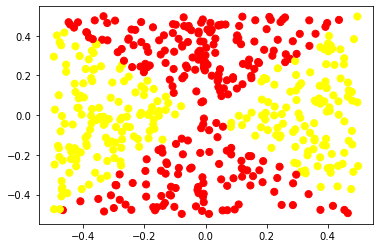

In [298]:
plt.scatter(Data_5['X1'],Data_5['X2'],c=Data_5['Y'],cmap = 'autumn' , s = 50)

5b)  Train a logistic regression model for this data and calculate its accuracy (you may use the sklear.metrics function accuracy_score).  Create another scatterplot color coding the observations with the predicted values from your logistic regression model.

In [299]:
y1 = Data_5['Y']
X1 = Data_5.drop('Y', 1)
X1

,X1,X2
0,0.357812,0.073529
1,-0.045565,-0.264223
2,0.121110,0.155783
3,-0.474510,-0.081679
4,0.186818,-0.337614
...,...,...
495,0.409228,-0.264751
496,-0.080077,0.045124
497,-0.292078,-0.353279
498,-0.024140,-0.361942


In [300]:
mode_5 = LogisticRegression().fit(X1,y1)
y_pred=mode_5.predict(X1)

In [301]:
accuracy_score(y1, y_pred)

0.612

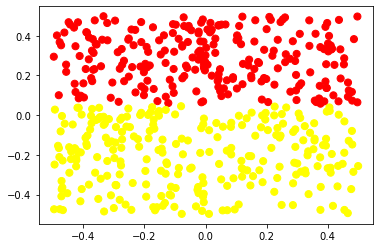

In [303]:
plt.scatter(Data_5['X1'],Data_5['X2'],c=y_pred,cmap = 'autumn' , s = 50)

5c)  Now, add the nonlinear terms $X_1^{2}$ and $X_2^{2}$ to your logistic regression classifier.  Calculate the resulting accuracy score and plot the observations color-coded with the prediction as in the plot created above.

In [304]:
Data_5['X1_2']=Data_5['X1']**2
Data_5['X2_2'] = Data_5['X2']**2
Data_5

,X1,X2,Y,X1_2,X2_2
0,0.357812,0.073529,1,0.128030,0.005407
1,-0.045565,-0.264223,0,0.002076,0.069814
2,0.121110,0.155783,0,0.014668,0.024268
3,-0.474510,-0.081679,1,0.225160,0.006672
4,0.186818,-0.337614,0,0.034901,0.113983
...,...,...,...,...,...
495,0.409228,-0.264751,1,0.167468,0.070093
496,-0.080077,0.045124,1,0.006412,0.002036
497,-0.292078,-0.353279,0,0.085310,0.124806
498,-0.024140,-0.361942,0,0.000583,0.131002


In [190]:
y2 = Data_5['Y']
X2 = Data_5.drop('Y', 1)
X2

,X1,X2,X1_2,X2_2
0,0.357812,0.073529,0.128030,0.005407
1,-0.045565,-0.264223,0.002076,0.069814
2,0.121110,0.155783,0.014668,0.024268
3,-0.474510,-0.081679,0.225160,0.006672
4,0.186818,-0.337614,0.034901,0.113983
...,...,...,...,...
495,0.409228,-0.264751,0.167468,0.070093
496,-0.080077,0.045124,0.006412,0.002036
497,-0.292078,-0.353279,0.085310,0.124806
498,-0.024140,-0.361942,0.000583,0.131002


In [305]:
mode_5_new = LogisticRegression().fit(X2,y2)
y_pred_1 =mode_5_new.predict(X2)

In [306]:
accuracy_score(y2, y_pred_1)

0.922

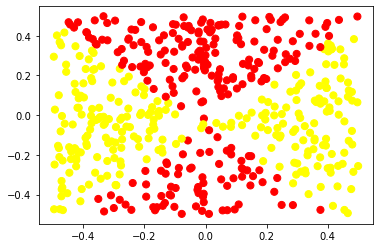

In [308]:
plt.scatter(Data_5['X1'],Data_5['X2'],c=y_pred_1,cmap = 'autumn' , s = 50)

5d)  Create a support vector classifier (using the SVC function from the sklearn.svm package) and train it with this dataset using a linear kernel and a regularization term C = 1.  As above, calculate its accuracy score and make a plot of the observations color-coded by the predictions.

In [309]:
model5_linear = SVC(C=1, kernel = 'linear')
model5_linear.fit(X1,y1)

SVC(C=1, kernel='linear')

In [310]:
y_pred_2 =model5_linear.predict(X1)

In [311]:
accuracy_score(y1, y_pred_2)

0.64

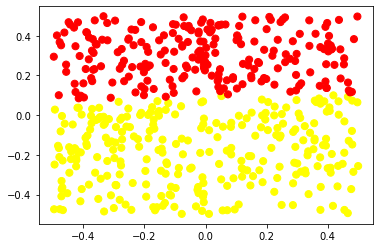

In [323]:
plt.scatter(Data_5['X1'],Data_5['X2'],c=y_pred_2,cmap = 'autumn' , s = 50)

5e)  Finally, create a supporv vector classifier and train it with this dataset using a radial basis function (rbf) kernel and a regularization term C = 1. As above, calculate its accuracy score and make a plot of the observations color-coded by the predictions.

In [324]:
model_5_rbf=SVC(kernel='rbf',C=1)
model_5_rbf.fit(X1,y1)

SVC(C=1)

In [325]:
y_pred_3=model_5_rbf.predict(X1)

In [326]:
accuracy_score(y1, y_pred_3)

0.972

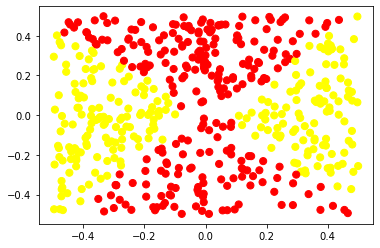

In [327]:
plt.scatter(Data_5['X1'],Data_5['X2'],c=y_pred_3,cmap = 'autumn' , s = 50)